In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Data/삼성전자-주가.csv")
df.head()

,일자,시가,고가,저가,종가,거래량
0,20200107,55700,56400,55600,55800,9893846
1,20200106,54900,55600,54600,55500,10278951
2,20200103,56000,56600,54900,55500,15422255
3,20200102,55500,56000,55000,55200,12993228
4,20191230,56200,56600,55700,55800,8356767


In [3]:
# Data 크기
df.shape

(9288, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   일자      9288 non-null   int64
 1   시가      9288 non-null   int64
 2   고가      9288 non-null   int64
 3   저가      9288 non-null   int64
 4   종가      9288 non-null   int64
 5   거래량     9288 non-null   int64
dtypes: int64(6)
memory usage: 435.5 KB


---
### 전처리(Preprocessing)

In [7]:
# 일자 컬럼을 날짜형으로 변환

df.일자 = \
    pd.to_datetime(
        df.일자,
        format="%Y%m%d"
    )
df.head()

,일자,시가,고가,저가,종가,거래량
0,2020-01-07,55700,56400,55600,55800,9893846
1,2020-01-06,54900,55600,54600,55500,10278951
2,2020-01-03,56000,56600,54900,55500,15422255
3,2020-01-02,55500,56000,55000,55200,12993228
4,2019-12-30,56200,56600,55700,55800,8356767


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      9288 non-null   datetime64[ns]
 1   시가      9288 non-null   int64         
 2   고가      9288 non-null   int64         
 3   저가      9288 non-null   int64         
 4   종가      9288 non-null   int64         
 5   거래량     9288 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 435.5 KB


In [11]:
# 연도, 월, 일 컬럼 추가
df['연도'] = df.일자.dt.year
df['월'] = df.일자.dt.month
df['일'] = df.일자.dt.day

df.head()

,일자,시가,고가,저가,종가,거래량,연도,월,일
0,2020-01-07,55700,56400,55600,55800,9893846,2020,1,7
1,2020-01-06,54900,55600,54600,55500,10278951,2020,1,6
2,2020-01-03,56000,56600,54900,55500,15422255,2020,1,3
3,2020-01-02,55500,56000,55000,55200,12993228,2020,1,2
4,2019-12-30,56200,56600,55700,55800,8356767,2019,12,30


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      9288 non-null   datetime64[ns]
 1   시가      9288 non-null   int64         
 2   고가      9288 non-null   int64         
 3   저가      9288 non-null   int64         
 4   종가      9288 non-null   int64         
 5   거래량     9288 non-null   int64         
 6   연도      9288 non-null   int32         
 7   월       9288 non-null   int32         
 8   일       9288 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(5)
memory usage: 544.3 KB


### 시각화

In [13]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [14]:
# 데이터의 연도 범위 확인
df.연도.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988,
       1987, 1986, 1985])

In [17]:
# 1990년 이후 data만 사용 
df = df[df.연도 >= 1990]
df.연도.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990])

In [18]:
df.shape

(7828, 9)

In [19]:
import seaborn as sns

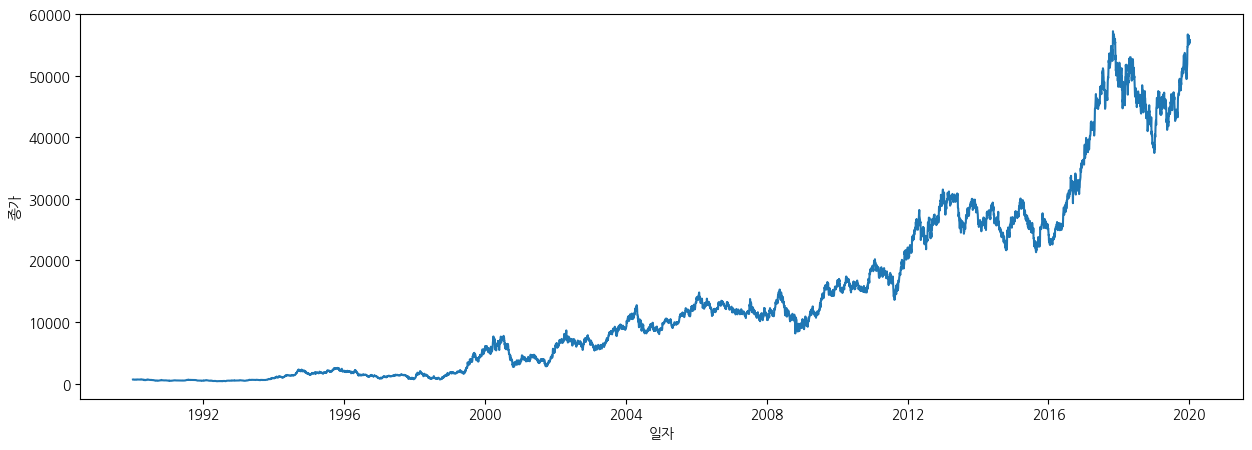

In [20]:
# 일자별 종가 기준으로 시각화
plt.figure(figsize=(15, 5))
sns.lineplot(
    x=df.일자,
    y=df.종가
    # x='일자',
    # y='종가',
    # data=df
)
plt.show()

In [22]:
# 정렬
df.sort_values('일자')

,일자,시가,고가,저가,종가,거래량,연도,월,일
7827,1990-01-03,673,689,661,685,1715032,1990,1,3
7826,1990-01-04,689,701,685,693,2738562,1990,1,4
7825,1990-01-05,689,693,678,678,1790849,1990,1,5
7824,1990-01-06,685,689,681,681,1724183,1990,1,6
7823,1990-01-08,681,687,673,673,966666,1990,1,8
...,...,...,...,...,...,...,...,...,...
4,2019-12-30,56200,56600,55700,55800,8356767,2019,12,30
3,2020-01-02,55500,56000,55000,55200,12993228,2020,1,2
2,2020-01-03,56000,56600,54900,55500,15422255,2020,1,3
1,2020-01-06,54900,55600,54600,55500,10278951,2020,1,6


In [24]:
# 현재 내림차순 정렬로 되어 있는 df를 오름차순으로 정렬후 적용

df = df.sort_values('일자').reset_index(drop=True)
df.head()

,일자,시가,고가,저가,종가,거래량,연도,월,일
0,1990-01-03,673,689,661,685,1715032,1990,1,3
1,1990-01-04,689,701,685,693,2738562,1990,1,4
2,1990-01-05,689,693,678,678,1790849,1990,1,5
3,1990-01-06,685,689,681,681,1724183,1990,1,6
4,1990-01-08,681,687,673,673,966666,1990,1,8


In [25]:
# 일자와 관련된 컬럼을 제외하고 data의 크기 비교
columns = ['시가','고가','저가','종가','거래량']
df[columns].describe()

,시가,고가,저가,종가,거래량
count,7828.000000,7828.000000,7828.000000,7828.000000,7.828000e+03
mean,13102.048927,13243.941620,12957.559658,13101.641415,1.908968e+07
std,14157.419071,14285.315014,14022.456207,14155.504533,1.722374e+07
min,390.000000,396.000000,387.000000,393.000000,0.000000e+00
25%,1410.000000,1434.000000,1390.000000,1410.000000,8.008238e+06
50%,8865.000000,8960.000000,8745.000000,8860.000000,1.453765e+07
75%,21430.000000,21680.000000,21200.000000,21480.000000,2.546348e+07
max,57500.000000,57520.000000,56760.000000,57220.000000,3.266220e+08


> 거래량과 다른 컬럼이 차이가 크므로 표준화 시도

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [29]:
dfScaled = scaler.fit_transform(df[columns])
dfScaled = pd.DataFrame(dfScaled)
dfScaled.columns = columns
dfScaled

,시가,고가,저가,종가,거래량
0,0.004955,0.005129,0.004860,0.005138,0.005251
1,0.005236,0.005339,0.005286,0.005279,0.008384
2,0.005236,0.005199,0.005162,0.005015,0.005483
3,0.005165,0.005129,0.005215,0.005068,0.005279
4,0.005095,0.005094,0.005073,0.004927,0.002960
...,...,...,...,...,...
7823,0.977237,0.983895,0.981197,0.975012,0.025585
7824,0.964980,0.973391,0.968779,0.964454,0.039781
7825,0.973735,0.983895,0.967005,0.969733,0.047217
7826,0.954474,0.966389,0.961684,0.969733,0.031470


---
### Feature와 Target

In [30]:
feature = dfScaled[['시가','고가','저가','거래량']]
target = dfScaled['종가']

In [31]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7828 entries, 0 to 7827
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      7828 non-null   float64
 1   고가      7828 non-null   float64
 2   저가      7828 non-null   float64
 3   거래량     7828 non-null   float64
dtypes: float64(4)
memory usage: 244.8 KB


In [32]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7828 entries, 0 to 7827
Series name: 종가
Non-Null Count  Dtype  
--------------  -----  
7828 non-null   float64
dtypes: float64(1)
memory usage: 61.3 KB


---
### Train, Test, Valid 만들기

In [33]:
from sklearn.model_selection import train_test_split

#### Train과 Test

In [34]:
train_data, test_data, train_target, test_target = \
                            train_test_split(
                                feature,
                                target,
                                random_state=42,
                                test_size=0.2
                            )

In [35]:
# 확인
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(6262, 4)
(1566, 4)
(6262,)
(1566,)


#### train과 valid 만들기

In [36]:
x_train, x_valid, y_train, y_valid = \
        train_test_split(
            train_data,
            train_target,
            random_state=42,
            test_size=0.2
        )

In [37]:
# 확인
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(5009, 4)
(1253, 4)
(5009,)
(1253,)


#### RandomForest

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

In [39]:
# Model
rf = RandomForestRegressor(
            n_jobs=-1, # 내 PC의 모든 자원을 사용 
            random_state=42
        )

In [40]:
scores = cross_validate(
                rf,
                x_train,
                y_train,
                cv=6,
                n_jobs=-1,
                return_train_score=True,
)

In [41]:
scores

{'fit_time': array([0.46624827, 0.39038301, 0.86507225, 0.92940736, 0.88636446,
        0.92402601]),
 'score_time': array([0.498312  , 0.61902356, 0.03614855, 0.03105974, 0.03614855,
        0.04383731]),
 'test_score': array([0.99982894, 0.99983229, 0.99987491, 0.99989361, 0.99987882,
        0.99989243]),
 'train_score': array([0.99998213, 0.99998301, 0.9999815 , 0.9999813 , 0.99998206,
        0.99998171])}

In [ ]:
# train 점수
scores['train_score'].mean()

0.9999819531210442

In [ ]:
# valid 점수
scores['test_score'].mean()

0.9998668350651106

> train의 검증은 끝났고    
> 일반화 성능 Test : train의 원래 데이터로 학습후 평가

In [45]:
rf.fit(train_data, train_target)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [46]:
print(rf.score(train_data, train_target))
print(rf.score(test_data, test_target))

0.999983806373095
0.9998820164284253
